## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn import tree
from sklearn import datasets
from sklearn.manifold import TSNE
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, binarize

In [2]:
iris = datasets.load_iris()
X= iris.data
y = iris.target

## Iris

It is the normal iris dataset.

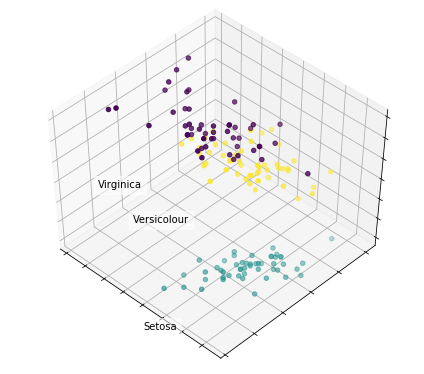

In [3]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [4]:
# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

#### 檢查每個label數量

In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

# Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [6]:
# Decision trees with depth = X
dt_model = DecisionTreeClassifier() #max_depth=3
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

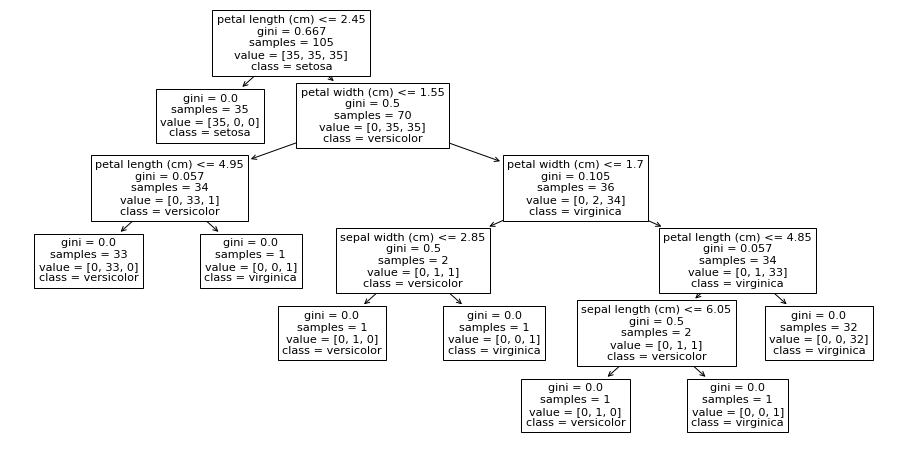

In [7]:
# using tree to show decisions
plt.figure(figsize = (16, 8))
tree.plot_tree(dt_model,
               feature_names = iris.feature_names,
               class_names = iris.target_names)
plt.show()

# Question #2:

Predict the testing data. What is your accuracy_score?

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predicting results for test dataset
flower_y_pred = dt_model.predict(X_test)
#print(tree.score())
print('Accuracy:', accuracy_score(y_test, flower_y_pred))

Accuracy: 0.8888888888888888


# Question #3:

Try to use PCA to reduce the dimensionality to 
### 2. Use the entire iris dataset. (DO NOT use training/testing data.) 
### Plot 2-d figure with PCA data and their labels.

#### 要畫圖的話用全部的data去PCA會比較好畫

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# from sklearn import decomposition

# pca = decomposition.PCA(n_components=2)
# pca.fit(X)
# X_pca = pca.transform(X)



pca = PCA(n_components=2)
X_transformed = pca.fit_transform(StandardScaler().fit_transform(iris.data))

print(X_transformed.shape)

(150, 2)


## Plotting the results of PCA

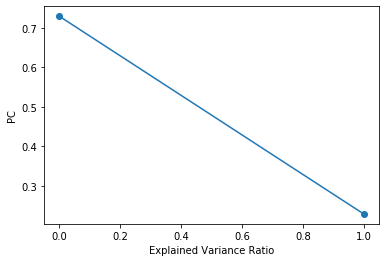

In [10]:
def plotData(plt, data):
    #data =  [(0, 0.7296244541329987), (1, 0.2285076178670178)] 2個varience PCA
    x = [p[0] for p in data]  #x = [0,1]
    y = [p[1] for p in data]    
    plt.plot(x, y, '-o')

plotData(plt, list(zip(range(X_transformed.shape[1]), pca.explained_variance_ratio_)))
plt.ylabel("PC")
plt.xlabel("Explained Variance Ratio")
plt.show()

# Score plot of the first 2 PC

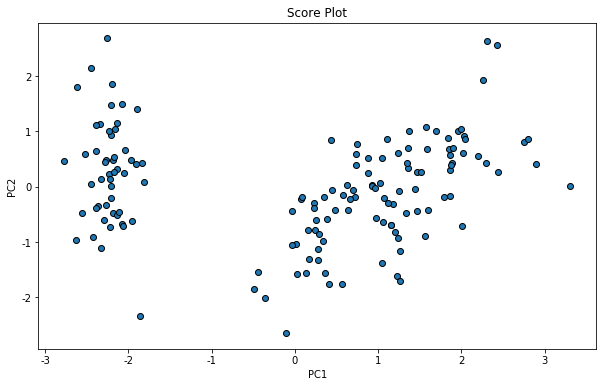

In [11]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], edgecolors='k' )#, c=y, cmap=plt.cm.Set1
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.show()

# Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [12]:
# Train, test splits

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [13]:
print("X_train 的 shape", X_train.shape)
print("X_test 的 shape ", X_test.shape)

X_train 的 shape (105, 4)
X_test 的 shape  (45, 4)


先對X_train進行標準化找到x_train的平均值以及標準差

In [14]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
print(X_train_norm)

[[-0.90045861 -1.22024754 -0.4419858  -0.13661044]
 [ 0.38036614 -1.87955796  0.40282929  0.38029394]
 [-0.90045861  1.63676428 -1.2868009  -1.17041921]
 [ 1.07899781  0.31814344  1.19132338  1.41410271]
 [-0.20182693 -0.56093712  0.17754527  0.12184175]
 [ 0.9625592  -0.12139684  0.79707634  1.41410271]
 [-1.13333583  0.0983733  -1.2868009  -1.4288714 ]
 [-0.90045861  1.63676428 -1.23047989 -1.29964531]
 [-1.7155289  -0.34116698 -1.3431219  -1.29964531]
 [ 1.42831365 -0.12139684  1.19132338  1.15565051]
 [ 0.72968197  0.31814344  0.74075533  1.02642442]
 [-1.13333583 -0.12139684 -1.3431219  -1.29964531]
 [-1.01689722 -0.12139684 -1.23047989 -1.29964531]
 [ 0.14748891 -0.34116698  0.40282929  0.38029394]
 [-0.43470415 -1.44001768  0.00858225 -0.13661044]
 [ 1.54475226  0.31814344  1.24764439  0.76797223]
 [-1.01689722  0.75768372 -1.23047989 -1.04119311]
 [-1.36621306  0.31814344 -1.23047989 -1.29964531]
 [ 0.9625592   0.53791358  1.07868137  1.6725549 ]
 [ 0.0310503   0.31814344  0.57

針對X_train進行PCA降維

In [15]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_norm)
print(pca.explained_variance_ratio_)

[0.7264421  0.23378786]


降維後剩前兩個variance最大的

In [16]:
print("original shape:   ", X_train_norm.shape)
print("transformed shape:", X_train_pca.shape)

original shape:    (105, 4)
transformed shape: (105, 2)


將training data從sc.fit_transform訓練得到的平均值以及標準差套用在test data，才會是同樣的標準

In [17]:
X_test_norm = sc.transform(X_test)
print("X_test 的 shape",len(X_test_norm))
print()
print(X_test_norm)

X_test 的 shape 45

[[ 1.66119088 -0.34116698  1.41660741  0.76797223]
 [ 0.26392752 -0.34116698  0.51547131  0.25106784]
 [ 0.49680475 -0.56093712  0.74075533  0.38029394]
 [ 0.49680475  0.53791358  0.51547131  0.50952003]
 [ 0.26392752 -0.12139684  0.62811332  0.76797223]
 [ 0.9625592   0.0983733   1.02236036  1.5433288 ]
 [-0.43470415 -1.65978782  0.12122426  0.12184175]
 [-0.31826554 -1.22024754  0.06490325 -0.13661044]
 [-0.55114277  0.75768372 -1.17415888 -1.29964531]
 [ 1.19543642  0.0983733   0.74075533  1.41410271]
 [-0.08538832  2.07630456 -1.45576392 -1.29964531]
 [-1.7155289  -0.12139684 -1.39944291 -1.29964531]
 [ 0.9625592  -1.22024754  1.13500238  0.76797223]
 [ 0.72968197 -0.12139684  0.96603936  0.76797223]
 [-0.78401999  0.75768372 -1.3431219  -1.29964531]
 [ 0.38036614  0.75768372  0.90971835  1.41410271]
 [-1.13333583 -1.44001768 -0.27302278 -0.26583654]
 [-0.55114277  1.41699414 -1.2868009  -1.29964531]
 [-0.90045861  0.53791358 -1.17415888 -0.91196702]
 [-0.2018269

將X_test套用PCA

In [18]:
X_test_pca = pca.transform(X_test_norm)

降維後的x_test

In [19]:
print("original shape:   ", X_test_norm.shape)
print("transformed shape:", X_test_pca.shape)

original shape:    (45, 4)
transformed shape: (45, 2)


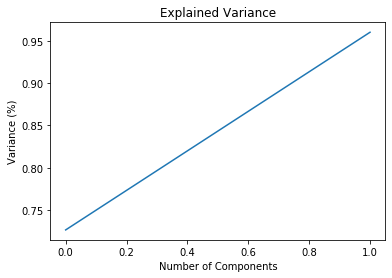

In [20]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [21]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = decisionTree.predict(X_test_pca)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Accuracy 0.9111111111111111


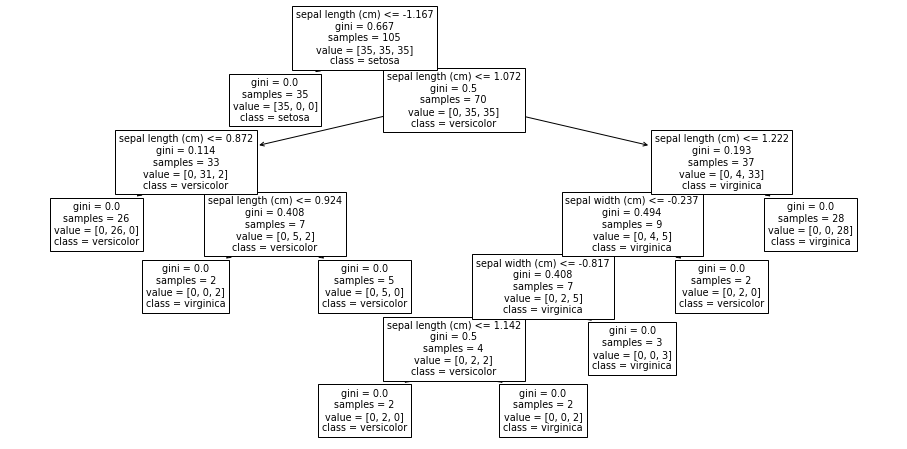

In [23]:
# using tree to show decisions'
plt.figure(figsize = (16, 8))
tree.plot_tree(decisionTree,
               feature_names = iris.feature_names,
               class_names = iris.target_names)
plt.show()

### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  

In [24]:
data = pd.DataFrame(X, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
data['Label'] = y.tolist() #把target加到dataframe

###  多元離群值分析

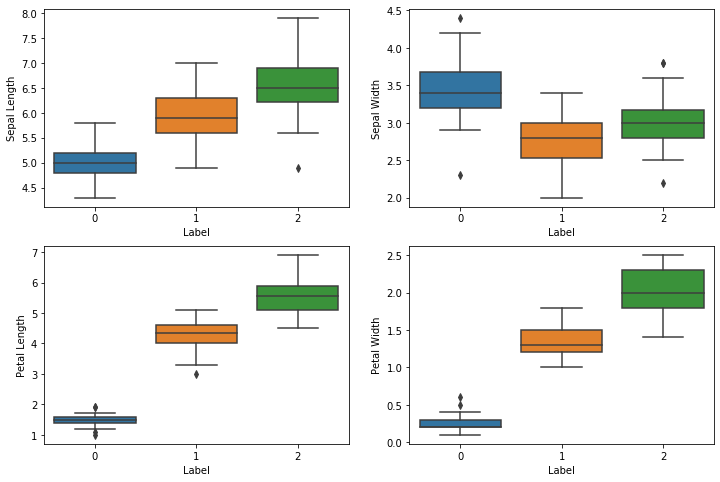

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x = "Label", y = "Sepal Length", data = data)
plt.subplot(2,2,2)
sns.boxplot(x = "Label", y = "Sepal Width", data = data)
plt.subplot(2,2,3)
sns.boxplot(x = "Label", y = "Petal Length", data = data)
plt.subplot(2,2,4)
sns.boxplot(x = "Label", y = "Petal Width", data = data)
plt.show()

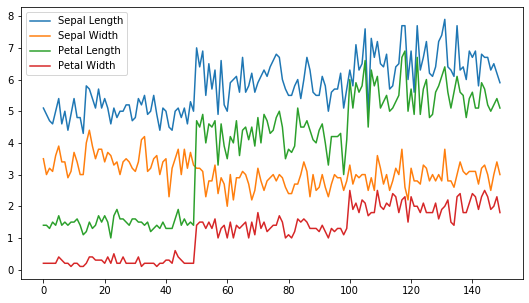

In [26]:
a = pd.DataFrame(data,columns=data.columns[0:4])
plt.figure(figsize=(9,5))
plt.plot(a) 
plt.legend(data.columns[0:4]) 
plt.show()

### 在iris鳶尾花資料上使用PCA降維，將4個特徵縮減到2個，再套用決策樹，並沒有帶來更高的準確率．

以下推測是因為：
1. 花瓣與花萼的長度與寬度在這個資料及上的這三個品種裡面，從上面的box plot可以看到，以三種不同品種分類下去看每一個features都存在有離群值，但是主成份分析是希望資料投影後資料的變異量會最大化，利用特徵降維來萃取出資料中最有代表性的主成分，所以使用PCA完後的這些特徵與特徵向量 (eigenvector) 的線性組合所產生的新特徵可能已經捨去原本的離群值，因此可能會丟掉一些噪音並留下區分性信息。問題它同樣會丟棄一些有用的信息

2. 此外PCA可能降低信號內的自相關關聯的訊息，因為 PCA 是對資料求共變異數矩陣，在進行奇異值分解。因此會被資料的差異性影響，無法很好表現相似性以及分佈．


3. PCA 是一種線性降維的方式，但如果特徵與特徵間的關聯是非線性關係的話，用 PCA 可能會導致欠擬合（underfitting）的情形發生

4. 由於維數災難（curse of dimensionality）高維資料中的距離關係不能完整在低維空間中保留，各個分群會有聚集在一起無法區分的擁擠問題（crowding problem）
5. 決策樹是通過學習從數據特徵推斷出的簡單決策規則，但是原本的iris資料集就已經沒有很多資料訊息，沒有很多維度(dimensions)，再加上前面幾點，PCA可能又把一些重要訊息捨去，所以決策樹沒有使用PCA transform過的會比有使用PCA的準確率還高 

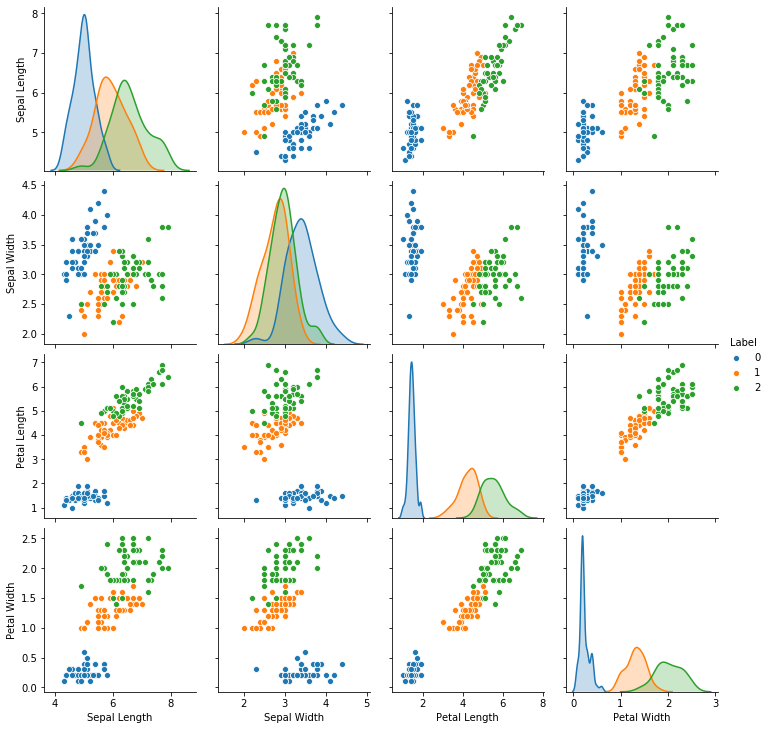

In [27]:
sns.pairplot(data, hue='Label')

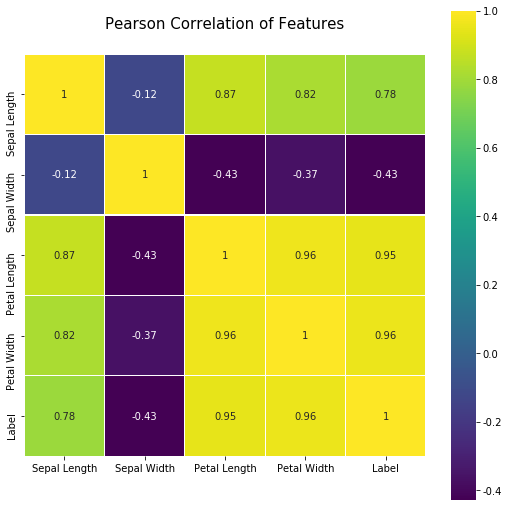

In [28]:
plt.figure(figsize=(9,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=plt.cm.viridis, linecolor='white', annot=True)
plt.show()

從上面的散佈圖矩陣我們可以發現Petal.Length和Petal.Width之間存有線性關係，都可區分第1和第2個鳶尾花類別，即Setosa和Versicolor類別，可看到第2和第3個鳶尾花類別，即Versicolor和Virginica的Sepal.Length和Sepal.Width分佈相近

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

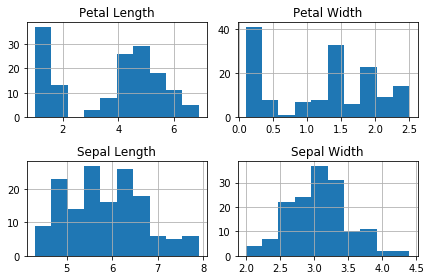

In [29]:
exclude = ['Id','Label']
#plt.figure(figsize=(15,10))
data.loc[:, data.columns.difference(exclude)].hist() 
plt.tight_layout()
plt.show()

### 離散化Sepal Length

In [30]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


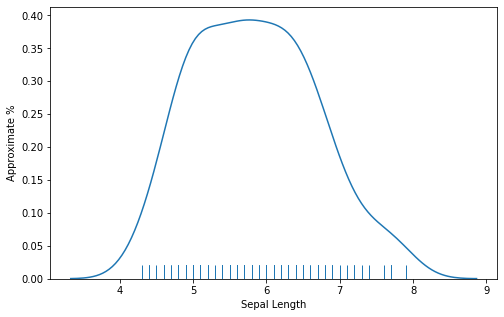

In [31]:
plt.subplots(1,1,figsize=(8,5))
ax = sns.distplot(data['Sepal Length'], hist=False, rug=True)
ax.set_ylabel("Approximate %")
plt.show()

In [32]:
data.loc[ data['Sepal Length'] <= 4, 'Sepal Length'] = 0
data.loc[(data['Sepal Length'] > 4) & (data['Sepal Length'] <= 5),   'Sepal Length'] = 1
data.loc[(data['Sepal Length'] > 5) & (data['Sepal Length'] <= 6.5), 'Sepal Length'] = 2
data.loc[(data['Sepal Length'] > 6.5) & (data['Sepal Length'] <= 8), 'Sepal Length'] = 3
data.loc[data['Sepal Length'] > 8, 'Sepal Length'] = 4
data['Sepal Length'] = data['Sepal Length'].astype(int)

### 離散化Sepal Width

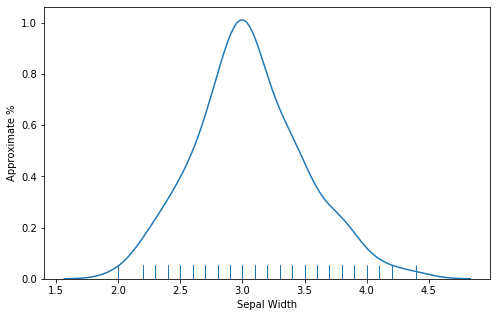

In [33]:
plt.subplots(1,1,figsize=(8,5))
ax = sns.distplot(data['Sepal Width'], hist=False, rug=True)
ax.set_ylabel("Approximate %")
plt.show()

In [34]:
data.loc[ data['Sepal Width'] <= 2, 'Sepal Width'] = 0
data.loc[(data['Sepal Width'] > 2) & (data['Sepal Width'] <= 2.8),   'Sepal Width'] = 1
data.loc[(data['Sepal Width'] > 2.8) & (data['Sepal Width'] <= 3.2), 'Sepal Width'] = 2
data.loc[(data['Sepal Width'] > 3.2) & (data['Sepal Width'] <= 4), 'Sepal Width'] = 3
data.loc[data['Sepal Width'] > 4, 'Sepal Width'] = 4
data['Sepal Width'] = data['Sepal Width'].astype(int)

### 離散化Petal Length

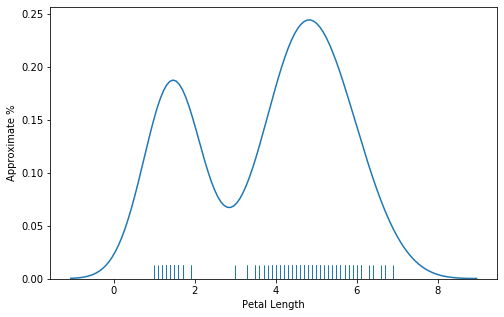

In [35]:
plt.subplots(1,1,figsize=(8,5))
ax = sns.distplot(data['Petal Length'], hist=False, rug=True)
ax.set_ylabel("Approximate %")
plt.show()

In [36]:
data.loc[ data['Petal Length'] <= 1, 'Petal Length'] = 0
data.loc[(data['Petal Length'] > 1) & (data['Petal Length'] <= 3),   'Petal Length'] = 1
data.loc[(data['Petal Length'] > 3) & (data['Petal Length'] <= 6), 'Petal Length'] = 2
data.loc[data['Petal Length'] > 6, 'Petal Length'] = 3
data['Petal Length'] = data['Petal Length'].astype(int)

### 離散化Petal Width

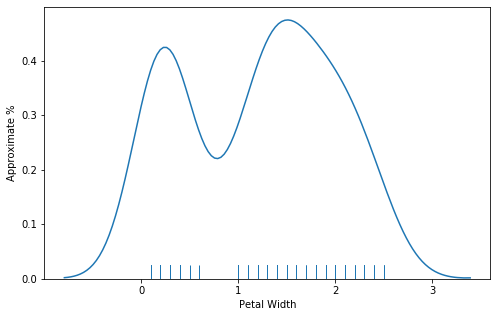

In [37]:
plt.subplots(1,1,figsize=(8,5))
ax = sns.distplot(data['Petal Width'], hist=False, rug=True)
ax.set_ylabel("Approximate %")
plt.show()

In [38]:
data.loc[ data['Petal Width'] <= 0.8, 'Petal Width'] = 0
data.loc[(data['Petal Width'] > 0.8) & (data['Petal Width'] <= 2.5),'Petal Width'] = 1
data.loc[data['Petal Width'] > 2.5, 'Petal Width'] = 2
data['Petal Width'] = data['Petal Width'].astype(int)

### 把Label one hot encoding 並且多增加3個features

In [39]:
# splicing dataframes together by merging
# recall `iris.target` is in terms of 0, 1, 2, not symbolic (setosa, etc).
encoded_species = pd.get_dummies(data.Label)
encoded_df = pd.merge(data, encoded_species,
                      right_index=True, left_index=True)
encoded_df.iloc[[0,50,100]]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label,0,1,2
0,2,3,1,0,0,1,0,0
50,3,2,2,1,1,0,1,0
100,2,3,2,1,2,0,0,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('Label',axis=1), encoded_df.Label, test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [41]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)

### 把components用累計的variance決定

In [42]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train_norm)
print(pca.explained_variance_ratio_)

[0.59533953 0.25127024 0.1053044  0.0286067  0.01947913]


In [43]:
print("original shape:   ", X_train_norm.shape)
print("transformed shape:", X_train_pca.shape)

original shape:    (105, 7)
transformed shape: (105, 5)


In [44]:
X_test_norm = sc.transform(X_test)
X_test_pca = pca.transform(X_test_norm)

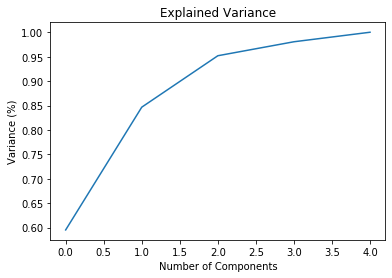

In [45]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [46]:
decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = decisionTree.predict(X_test_pca)

In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy 1.0


## MNIST

Let's look at a famous handwritten numbers dataset.

In [48]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

查看資料資訊

In [49]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
target_names (10,)
images (1797, 8, 8)
DESCR


![title](04.08.png)

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

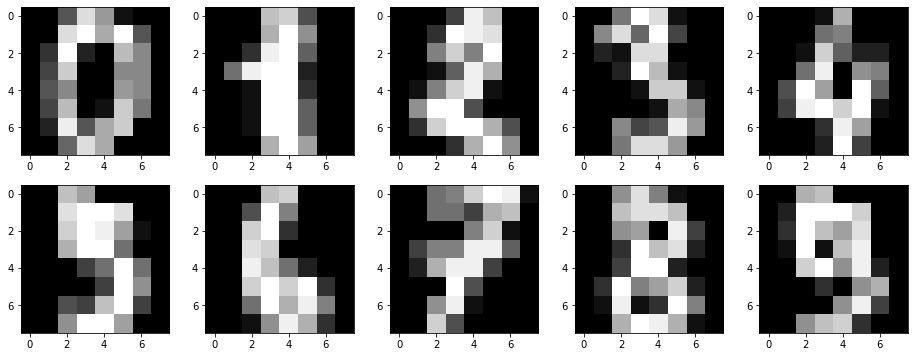

In [50]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

In [51]:
# Try plt.scatter and 'c' parameter
# Try plt.colorbar()

sc = StandardScaler()
digi_X_norm = sc.fit_transform(digi_X)
print(digi_X_norm)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [52]:
pca = PCA(n_components=2)
digi_X_pca = pca.fit_transform(digi_X_norm)
print(pca.explained_variance_ratio_)

[0.12033916 0.09561054]


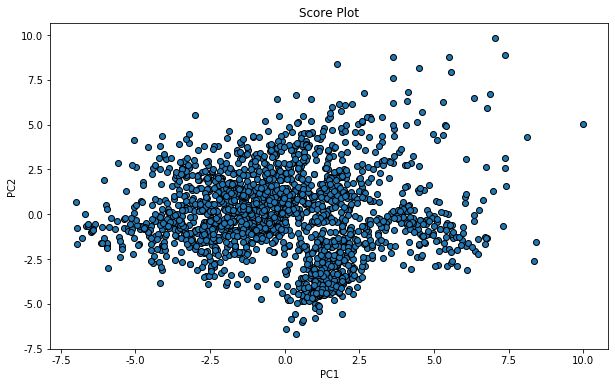

In [53]:
fig = plt.figure(figsize=(10,6))
plt.scatter(digi_X_pca[:, 0], digi_X_pca[:, 1], edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.show()

### Question #8:

Why the figure looks bad? How many components would be better?
### 兩個維度的方差加起來只有22％左右所以取的components太少

two variance ratio [0.12033916 0.09561054]



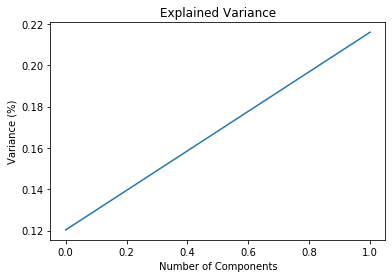

In [54]:
# hint: take a look at pca.explained_variance_ratio_
print("two variance ratio", pca.explained_variance_ratio_)
print()
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

### 從最原始的資料裡面64個features來看選幾個components比較好

In [55]:
sc = StandardScaler()
digi_X_norm = sc.fit_transform(digi_X)
print(digi_X_norm)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [56]:
pca = PCA(n_components=64)
digi_X_pca = pca.fit_transform(digi_X_norm)
print(pca.explained_variance_ratio_)

[1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-34]


# 畫出需要幾個components

two variance ratio [1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-34]



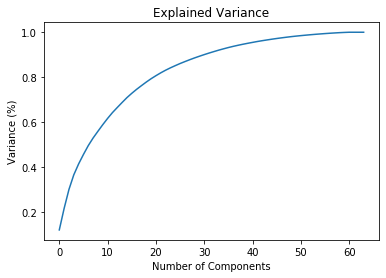

In [57]:
# hint: take a look at pca.explained_variance_ratio_
print("two variance ratio", pca.explained_variance_ratio_)
print()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

## 從以上的圖來看，發現選擇50上下的components是最好的，
## 因為方差和的比例接近1

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

將64維數據降成2維

Computing t-SNE embedding
[[ -3.4204912  58.5955   ]
 [ 27.62434   -18.95529  ]
 [ 19.166649   -7.4683604]
 ...
 [ 10.2774105 -12.201649 ]
 [-18.794807   28.649069 ]
 [  6.1570654  -8.49533  ]]


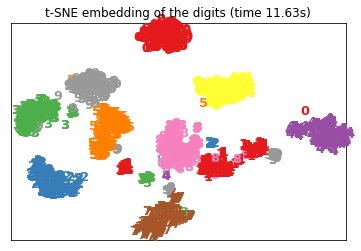

In [58]:
def get_data():
    data = digi_X
    label = digi_y
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 13})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time.time()
    result = tsne.fit_transform(data)
    print(tsne.embedding_)
    fig = plot_embedding(result, label,title="t‐SNE embedding of the digits (time %.2fs)" %
(time.time() - t0))
    plt.show(fig)


if __name__ == '__main__':
    main()

In [59]:
from matplotlib import offsetbox
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
        color=plt.cm.Set1(y[i] / 10.),
        fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]]) # just something big
    for i in range(digits.data.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            ## don't show points that are too close
            continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            X[i])
            ax.add_artist(imagebox)
            plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing PCA projection
Computing t‐SNE embedding


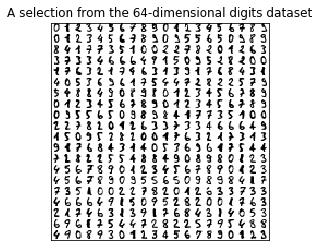

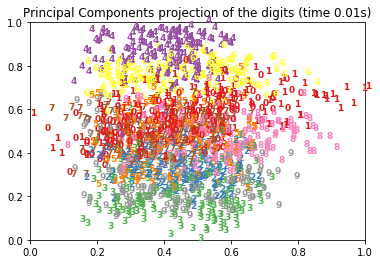

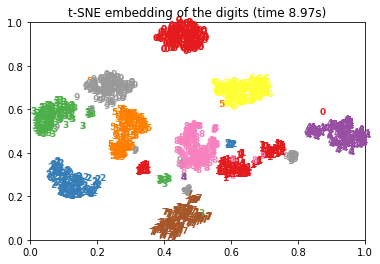

In [60]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64‐dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time.time()
X_pca = TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
"Principal Components projection of the digits (time %.2fs)" %
(time.time() - t0))
## Computing t‐SNE
print("Computing t‐SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time.time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
"t‐SNE embedding of the digits (time %.2fs)" %
(time.time() - t0))
plt.show()

用了更複雜的公式來表達高維與低維之間的關係。t-SNE 主要是將高維的數據用高斯分佈的機率密度函數近似，而低維數據的部分使用 t 分佈的方式來近似，在使用 KL 距離計算相似度，最後再以梯度下降（或隨機梯度下降）求最佳解

這是因為演算法定義了資料的區域性和全域性結構之間的軟邊界。

為了解決擁擠問題，在 t-SNE 中低維空間改用 t 分佈而非原本的高斯分佈，以 t 分佈表達的好處是 t 分佈較高斯分佈偏重長尾，使得高維度下中近的距離的樣本點在映射後能夠有一個較大的距離，且 t 分佈受異常值影響更小，在樣本數較少時仍可以模擬分佈情形而不受雜訊影響

維數災難（curse of dimensionality）通常用來說明給定固定數量的訓練樣本，模型預測能力隨著維度的增加而減小，造成這個現象的原因是當維數提高時，空間的體積提高太快，因而可用的資料點變得很稀疏

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

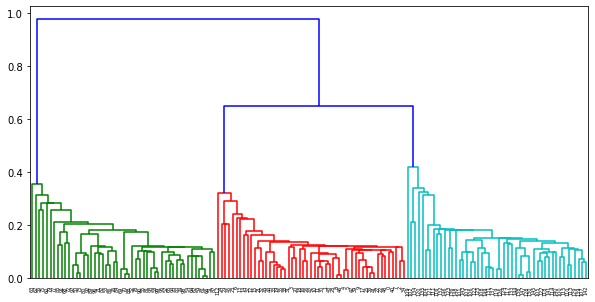

In [61]:
h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

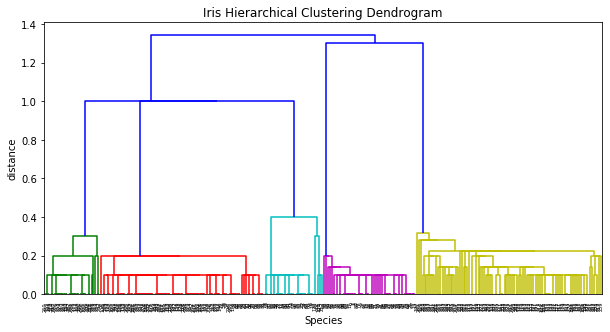

In [62]:
distance_mat = pdist(iris.data.reshape(300,2)) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

calculate full dendrogram for 50

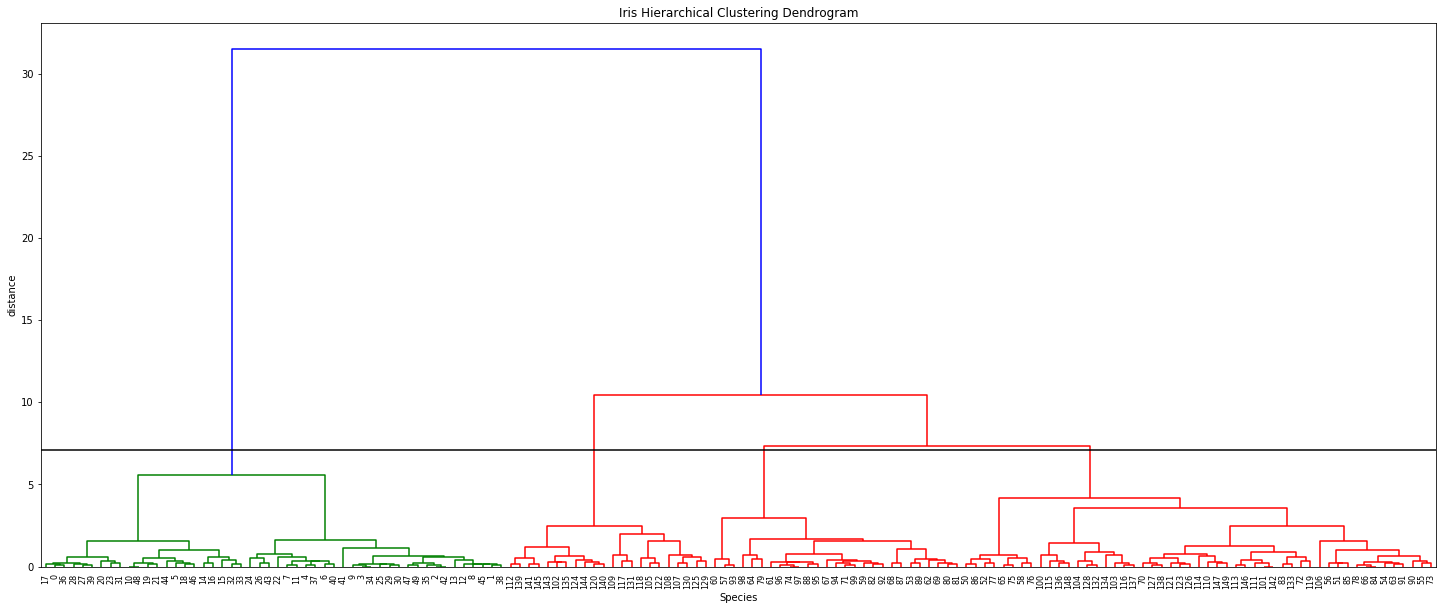

In [63]:
# generate the linkage matrix
Z = linkage(iris.data, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()